**1**(i added the images because the latex got too complicated)
![](images/1.jpg)


**2(a)**
![](images/2aa.jpg)

![](images/2ab.jpg)

 **2(b)**
![](images/2b.jpg)
![](images/2c.jpg)
 - prior $N(5,9)$ 
 - posterior $N(5.9,0.9)$

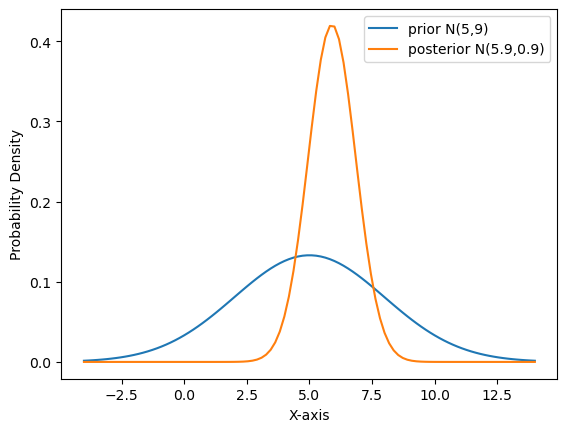

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(5-3*3, 5+3*3, 100)
mu_pr=5
var_pr=9
pdf1=1/np.sqrt(2*np.pi*var_pr)*np.exp(-1*(x-mu_pr)**2/(2*var_pr))
mu_p=5.9
var_p=0.9
pdf2=1/np.sqrt(2*np.pi*var_p)*np.exp(-1*(x-mu_p)**2/(2*var_p))
plt.plot(x,pdf1,label="prior N(5,9)")
plt.plot(x,pdf2,label='posterior N(5.9,0.9)')
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

![](images/2d.jpg)

**3** 
![](images/3.jpg)
- $\hat{\mu}=\frac{\Sigma y_i}{m}$
- $\hat{\sigma}^2=\frac{\Sigma(y_i-\mu)^2}{m}$

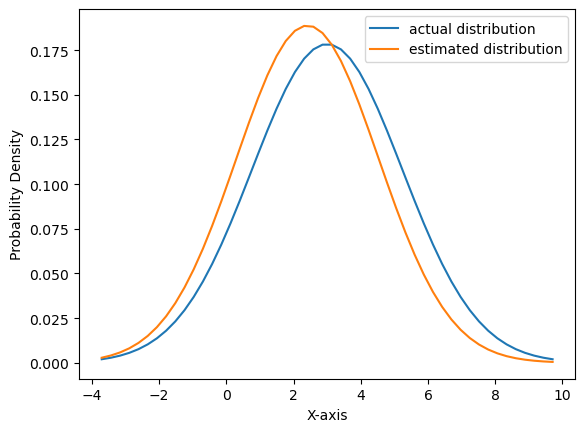

In [6]:
m=50
mu=3
var=5
x1 = np.linspace(3-np.sqrt(5)*3, np.sqrt(5)*3+3,m)
pdf=1/np.sqrt(2*np.pi*var)*np.exp(-1*(x1-mu)**2/(2*var))
y=np.random.normal(mu,np.sqrt(var),m)

#mean and variance estimates

mu_ml=np.sum(y)/m
var_ml=np.sum((y-mu_ml)**2)/m
pdf_ml=1/np.sqrt(2*np.pi*var_ml)*np.exp(-1*(x1-mu_ml)**2/(2*var_ml))
plt.plot(x1,pdf,label="actual distribution")
plt.plot(x1,pdf_ml,label="estimated distribution")
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()

**4**
![](images/4a.jpg)
![](images/4b.jpg)
update rule
- $\theta:=\theta+\alpha(\sum_{i=1}^{m}(y^i-h(\theta,x^i))-m\Sigma^{-1}(\theta-\mu))$

initializing the values

In [488]:
n=50
e=1e-5
b1=-1
b0=-1
mu1=0.25
mu0=-1
s1=0.1
s0=0.1

making the utility functions

In [489]:
b_1=[]
b_0=[]
def logit(b1,b0,x):
    return 1/(1+np.exp(-(b1*x+b0)))
def db1(x,y,b1,s1,mu1):
    return np.sum((y-logit(b1,b0,x))*x-((b1-mu1)/s1**2))
def db0(x,y,b0,s0,mu0):
    return np.sum((y-logit(b1,b0,x))-((b0-mu0)/s0**2))
def update(x,y,b1,b0,mu1,mu0,s1,s0,e):
    b_1.append(b1)
    b_0.append(b0)
    b1=b1+e*db1(x,y,b1,s1,mu1)
    b0=b0+e*db0(x,y,b0,s0,mu0)
    return b1,b0

generating data and update steps

In [490]:
x=np.linspace(0,8,100)
y=x>4
y=y.astype(int)
for i in range(n):
    b1,b0=update(x,y,b1,b0,mu1,mu0,s1,s0,e)

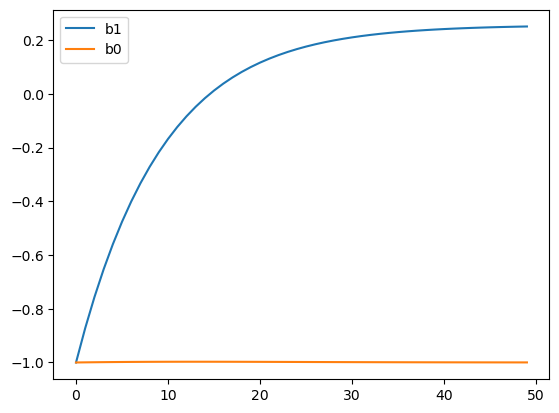

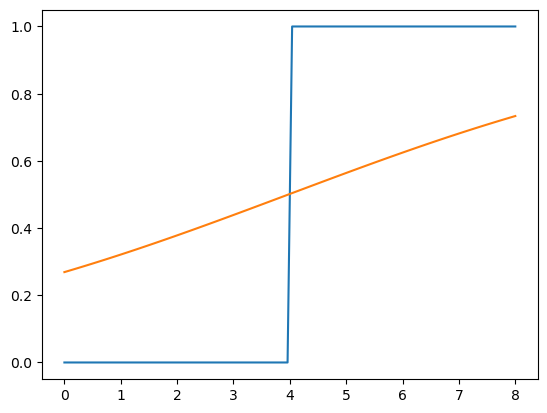

In [491]:
plt.plot(b_1,label="b1")
plt.plot(b_0,label="b0")
plt.legend()
plt.show()
plt.plot(x,y)
plt.plot(x,logit(b1,b0,x))
plt.show()

**5**
![](images/5ab.jpg)
![](images/5b.jpg)
![](images/5cd.jpg)

**6** ![](images/6.jpg)


In [492]:
import pandas as pd 
data=pd.read_csv("C:\\Users\\sarit\\Downloads\\dataset.csv")

In [493]:
data.columns

Index(['x'], dtype='object')

In [494]:
data_sort = data.sort_values(by='x')
N=int(len(data)/2)
data_1=data_sort.iloc[:N].to_numpy()
data_2=data_sort.iloc[N:].to_numpy()

In [495]:
#calculating initial estimates
import numpy as np

#estimates for data_1

mu_ml_1=np.sum(data_1)/N
var_ml_1=np.sum((data_1-mu_ml_1)**2)/N
mu_ml_1,var_ml_1

#estimates for data_2

mu_ml_2=np.sum(data_2)/N
var_ml_2=np.sum((data_2-mu_ml_2)**2)/N
mu_ml_1

1.8461362984768668

In [5]:
m=1000
x1 = np.linspace(mu_ml_1-3*np.sqrt(var_ml_1)-10,mu_ml_2+3*np.sqrt(var_ml_2),m)
pdf_ml_1=1/np.sqrt(2*np.pi*var_ml_1)*np.exp(-1*(x1-mu_ml_1)**2/(2*var_ml_1))
pdf_ml_2=1/np.sqrt(2*np.pi*var_ml_2)*np.exp(-1*(x1-mu_ml_2)**2/(2*var_ml_2))

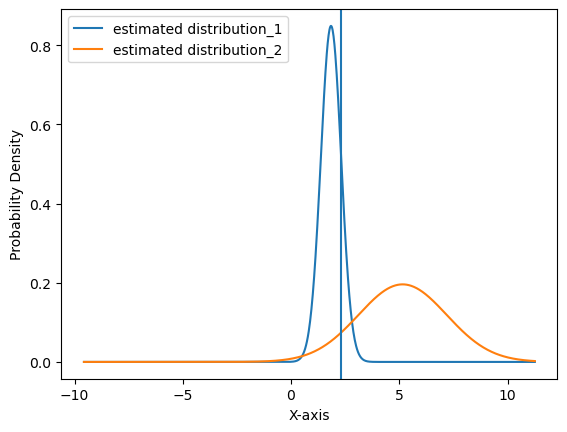

In [14]:
import matplotlib.pyplot as plt
plt.plot(x1,pdf_ml_1,label="estimated distribution_1")
plt.plot(x1,pdf_ml_2,label="estimated distribution_2")
plt.axvline(x=2.31646781)
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()

approach derived in pdf submitted

In [7]:
#initialize 
mu1=mu_ml_1
mu2=mu_ml_2
s1=np.sqrt(var_ml_1)
s2=np.sqrt(var_ml_2)
x=data.to_numpy().reshape(-1,)

helper function to calculate differentials $\frac{\partial J}{\partial \mu}$ etc

In [8]:
def p(x,mu,s):
    return 1/(np.sqrt(2*np.pi)*s)*np.exp(-(x-mu)**2/(2*(s**2)))
def dmu(x,mu,s):
    return np.sum(p(x,mu,s)*(x-mu)/((p(x,mu1,s1)+p(x,mu2,s2))*(s**2)))
def ds(x,mu,s):
    return np.sum(p(x,mu,s)*((x-mu)**2-s**2)/((p(x,mu1,s1)+p(x,mu2,s2))*(s**3)))

In [9]:
#list to keep the track of values after each update
mu_1=[]
mu_2=[]
s_1=[]
s_2=[]
#update function
def update(x,mu1,s1,mu2,s2,e):
    mu_1.append(mu1)
    mu_2.append(mu2)
    s_1.append(s1)
    s_2.append(s2)
    mu1=mu1+e*dmu(x,mu1,s1)
    s1=s1+e*ds(x,mu1,s1)
    mu2=mu2+e*dmu(x,mu2,s2)
    s2=s2+e*ds(x,mu2,s2)
    return mu1,s1,mu2,s2

In [10]:
#learning rate and number of iterations
n=300
e=10*1e-7
for i in range(n):
    mu1,s1,mu2,s2=update(x,mu1,s1,mu2,s2,e)
mu1,s1,mu2,s2

(2.000868990822787, 0.2710621718746432, 4.996883562571763, 2.29576841110821)

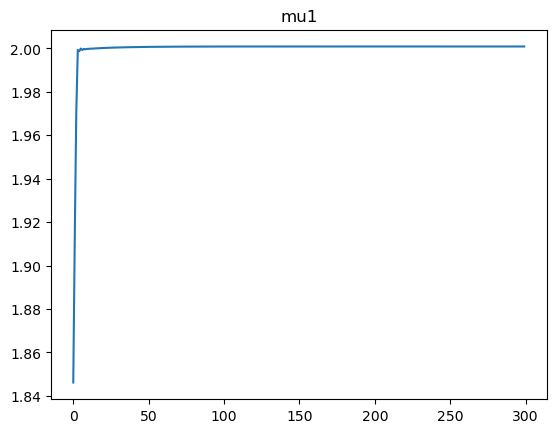

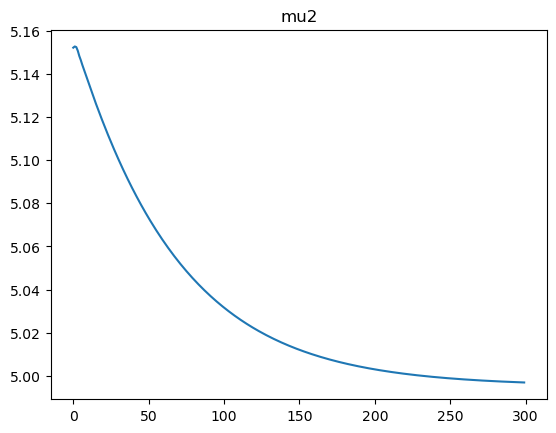

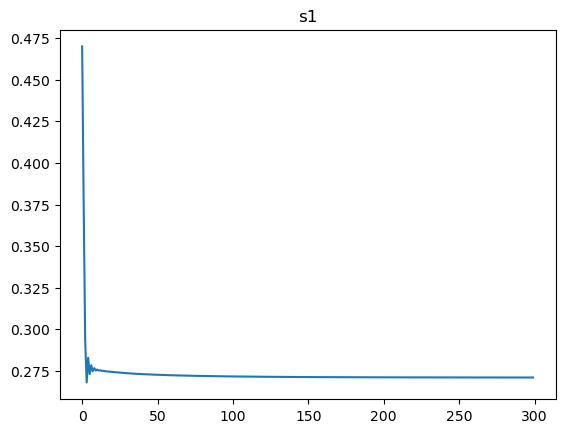

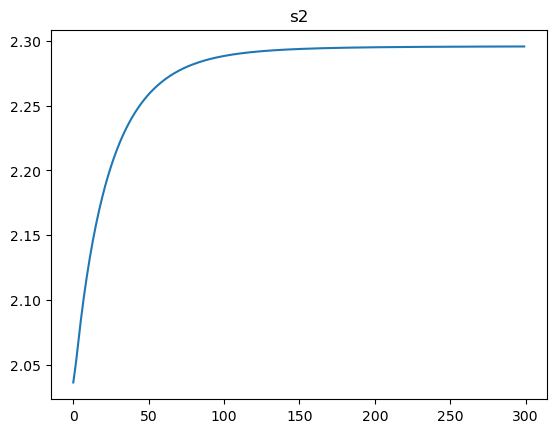

In [11]:
plt.plot(mu_1)
plt.title("mu1")
plt.show()
plt.plot(mu_2)
plt.title("mu2")
plt.show()
plt.plot(s_1)
plt.title("s1")
plt.show()
plt.plot(s_2)
plt.title("s2")
plt.show()

In [12]:
pdf=0.5*(1/np.sqrt(2*np.pi*s1**2)*np.exp(-1*(x1-mu1)**2/(2*s1**2))+1/np.sqrt(2*np.pi*s2**2)*np.exp(-1*(x1-mu2)**2/(2*s2**2)))

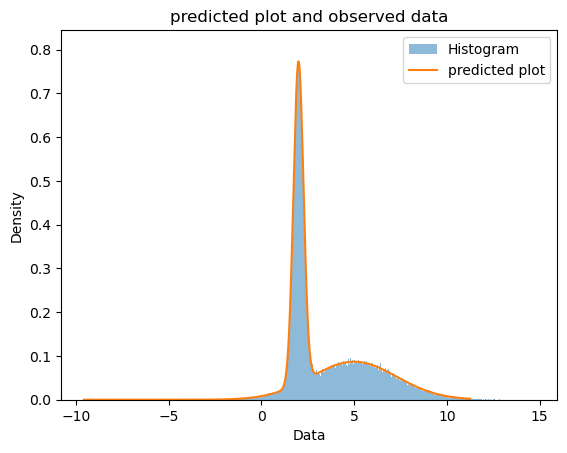

In [500]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(data, bins=1000, alpha=0.5, density=True, label='Histogram')

# Plot line plot
plt.plot(x1, pdf,label='predicted plot')

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('predicted plot and observed data')

# Add legend
plt.legend()

# Display the plot
plt.show()
